In [1]:
# import packages
import pandas as pd
import numpy as np

# set working directory
import os
os.chdir('/home/jovyan/work/')

In [2]:
from src.data.load_dataset import load_split_store
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# load_split_store
X_train, y_train, X_val, y_val, X_test, y_test, test_data = load_split_store(
                                                                    filepath='data/', 
                                                                    scaler=scaler, 
                                                                    resample=False, 
                                                                    random_state=42, 
                                                                    test_size=0.15,
                                                                    replace_negatives=False)

In [3]:
from joblib import load

week2_model = load(open('models/david_0214_xgb_hyperopt.joblib', 'rb'))

-----------
Confusion Matrix with thresthold of 0.5:


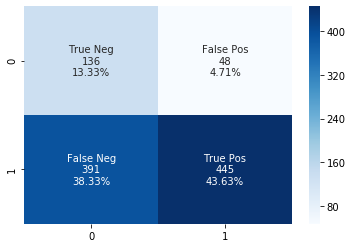

493 out of 1020 or 48% of players are predicted to be 5+ Yrs
-----------
Recall: 0.5323
Accuracy: 0.5696
F1: 0.6697
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.688


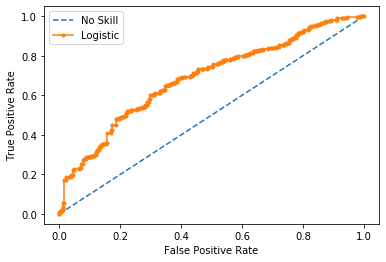

In [4]:
from src.visualization.visualize import eval_metrics

y_val_pred = week2_model.predict_proba(X_val)[:, 1]
eval_metrics(y_val_pred, y_val, praba_threshold=0.5)

In [5]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,20), timings=False)

In [6]:
from sklearn.mixture import GaussianMixture

nc = 7

clr_model = GaussianMixture(nc, random_state=42)

clr_model.fit(X_train)

obs_train = clr_model.predict(X_train)
obs_val = clr_model.predict(X_val)
obs_test = clr_model.predict(test_data)

In [7]:
X_train_clr = X_train.copy()
X_train_clr['cluster_group'] = obs_train

X_val_clr = X_val.copy()
X_val_clr['cluster_group'] = obs_val

test_clr = test_data.copy()
test_clr['cluster_group'] = obs_test

In [8]:
from src.features.build_features import add_features_min_average

X_train_nf = add_features_min_average(X_train_clr)
X_train_nf['Target'] = y_train

X_val_nf = add_features_min_average(X_val_clr)
X_val_nf['Target'] = y_val

test_nf = add_features_min_average(test_clr)

In [9]:
week2_model.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0.6,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.04,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 23.0,
 'monotone_constraints': '()',
 'n_jobs': 3,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 0.19966791199667913,
 'subsample': 0.30000000000000004,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eval_metric': 'logloss'}

In [10]:
X_train_nf

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,TOV,cluster_group,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm,Target
7629,-0.337538,-0.769658,-1.034416,-0.949075,-0.957280,-0.310135,-0.688743,-0.581170,0.888399,-1.179712,...,-1.186024,3,1.343996,1.532775,1.212210,0.598433,1.111486,0.388070,1.540976,1
6200,-0.746471,0.976343,0.980190,0.822648,1.246755,-1.252448,0.352736,0.549947,0.688426,1.735756,...,1.302827,1,1.003940,1.777814,0.321609,0.510254,1.385353,0.442619,1.334395,1
1201,-0.863309,-0.959927,-0.316568,-0.299443,-0.148204,-1.089980,-0.428374,-0.392651,1.357086,-0.531830,...,-0.771215,2,0.329784,0.554032,0.672156,0.787138,-0.131145,0.057370,0.803411,1
3219,0.889262,1.166612,0.169716,0.468303,0.102889,1.899427,-1.730223,-1.806547,-1.461284,0.008072,...,-0.079868,0,0.145478,0.006919,3.064732,0.110941,0.528509,1.727747,-0.068461,1
4320,-1.447500,0.069766,-0.223943,-0.299443,-0.622490,1.915673,-1.469853,-1.523768,-1.242564,1.411815,...,0.334941,4,-3.209915,20.236475,42.998404,-15.058967,-5.228734,4.448357,4.800923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,0.363491,-0.780850,-0.872322,-0.830960,-0.789885,-0.488849,0.352736,0.644207,1.019631,-1.071732,...,-0.909485,5,1.117144,1.372519,1.256257,-0.260199,-0.475415,2.410378,1.164737,1
2106,0.363491,0.416728,0.053934,0.350188,0.298183,0.339736,0.873476,1.021246,0.932143,-0.747791,...,-0.356407,2,0.129423,-1.794435,-0.742674,-0.043382,0.890815,-0.424440,-0.855252,1
3156,-1.681176,-0.702504,-0.548132,-0.830960,-0.901482,0.307243,1.394215,1.021246,0.857153,0.655953,...,-0.909485,2,0.780255,-0.933737,0.918458,1.600495,1.217735,-0.094994,1.294634,1
2935,-0.863309,-0.971119,-0.964947,-1.008132,-1.096776,0.047294,-1.730223,-1.712288,-0.417675,0.008072,...,-0.218137,2,0.993644,-0.008312,0.664409,0.929957,0.880905,0.182136,0.224625,1


In [14]:
from joblib import dump
import xgboost as xgb

clusters = np.unique(obs_train)

dump(clr_model, 'models/david_w3_gmm.joblib')

for grp in clusters:
    df = X_train_nf[X_train_nf['cluster_group']==grp]
    target = df.pop('Target')
    print(f'training group {grp}')
    df.pop('cluster_group')
    xgb_hpr = xgb.XGBClassifier(**week2_model.get_xgb_params(), use_label_encoder=False).fit(df, target)
    dump(xgb_hpr, 'models/david_w3_split_grp_'+str(grp)+'.joblib')

training group 0
training group 1
training group 2
training group 3
training group 4
training group 5
training group 6


In [31]:
import xgboost as xgb
from src.visualization.visualize import eval_metrics
from hpsklearn import HyperoptEstimator, sgd
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

space = {
    'max_depth' : hp.choice('max_depth', range(2, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.3, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 5, 30, 1),
    'subsample' : hp.quniform('subsample', 0.25, 0.4, 0.05)
}

def objective(space):
    from sklearn.model_selection import cross_val_score
    
    xgboost = xgb.XGBClassifier(
        objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=0.2,
        max_depth = int(space['max_depth']),
        learning_rate = space['learning_rate'],
        min_child_weight = space['min_child_weight'],
        subsample = space['subsample']
    )
    
    auc = cross_val_score(xgboost, X_train_nf, y_train, cv=10, scoring="roc_auc").mean()

    return{'loss': 1-auc, 'status': STATUS_OK }

In [32]:
best = fmin(
    fn=objective,   
    space=space,       
    algo=tpe.suggest,       
    max_evals=10
)

100%|██████████| 10/10 [00:12<00:00,  1.29s/trial, best loss: 0.0]


In [35]:
mod = xgb.XGBClassifier(
        objective='binary:logistic', use_label_encoder=False, eval_metric='logloss',
        scale_pos_weight=0.2,
        gamma = 0.6,
        max_depth = best['max_depth'],
        learning_rate = best['learning_rate'],
        min_child_weight = best['min_child_weight'],
        subsample = best['subsample']
    ).fit(X_train_nf, y_train)

y_pred = mod.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.6281854587060536

In [43]:
df_val_cluster = X_val_nf

dfc = pd.DataFrame()

for grp in clusters:
    print(f'predicting group {grp}')
    df = df_val_cluster[df_val_cluster['cluster_group']==grp]
    df1 = df.copy()
    y = df1.pop('Target')
    df1.pop('cluster_group')
    xgboost2 = xgb.XGClassifier(**mod.get_xgb_params()).fit(df, y)
    df['Pred_5Yrs'] = xgboost.predict_proba(df1)[:,1]
    dfc = dfc.append(df)

predicting group 0
predicting group 1
predicting group 2
predicting group 3


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


predicting group 4
predicting group 5
predicting group 6


In [44]:
clr_comp_val = dfc.groupby('cluster_group').agg(
                                                count=('Target', 'count'),
                                                tot_5yr=('Target', 'sum')
                                                )

clr_comp_val['pct_5yr'] = clr_comp_val['tot_5yr'] / clr_comp_val['count']

clr_comp_val

,count,tot_5yr,pct_5yr
cluster_group,,,
0,227,191,0.841410
1,844,721,0.854265
2,1824,1536,0.842105
3,1015,753,0.741872
4,1097,997,0.908842
5,549,409,0.744991
6,224,211,0.941964


In [45]:
dfc

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,...,cluster_group,PTS_pm,FTM_pm,REB_pm,AST_pm,STL_pm,BLK_pm,TOV_pm,Target,Pred_5Yrs
3219,0.889262,1.166612,0.169716,0.468303,0.102889,1.899427,-1.730223,-1.806547,-1.461284,0.008072,...,0,0.145478,0.006919,3.064732,0.110941,0.528509,1.727747,-0.068461,1,0.5
5350,-1.505919,-0.780850,-0.108161,0.173016,-0.120305,1.509504,-0.949113,-0.769690,-1.067587,-0.423850,...,0,0.138517,0.542806,-1.691982,1.345460,1.409748,-0.553433,1.341813,0,0.5
415,1.531872,0.584612,-0.131317,-0.122271,-0.092406,-0.066433,-1.209483,-0.863950,-1.148827,0.008072,...,0,-0.224622,0.013807,3.490519,-0.030924,0.634998,0.114151,0.809443,1,0.5
4444,0.071395,0.651766,0.401280,0.645475,0.577175,0.940867,-0.688743,-0.675430,-0.261446,-0.531830,...,0,0.615681,-0.815983,2.836532,-1.272461,-0.936111,5.708918,0.089605,1,0.5
484,-0.220700,-0.221234,-0.849165,-0.949075,-0.985179,-0.228901,-1.730223,-1.900807,-2.092449,0.224032,...,0,3.838308,-1.012647,-5.755089,3.415363,3.866778,-1.402782,2.860977,1,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,0.655586,1.088266,1.999071,2.535313,1.748940,2.126881,0.873476,1.115506,0.694675,0.332012,...,6,1.836932,0.305084,2.492088,-0.558771,0.341118,1.740205,0.561884,1,0.5
5054,1.999224,4.255691,3.620018,3.303059,3.171799,1.022101,0.092366,0.078648,0.963389,5.299106,...,6,0.850630,1.245181,0.783786,1.468813,0.894323,0.044303,1.280853,1,0.5
2879,2.057643,1.838151,1.975915,2.358141,1.721041,2.208115,-0.168004,-0.015612,-1.923722,0.979894,...,6,1.074947,0.533087,1.318873,0.471638,0.735837,0.698954,0.182216,1,0.5
4765,0.947681,2.990959,2.392730,2.594370,3.869278,-1.723604,2.696065,3.000701,2.344453,0.655953,...,6,0.799987,0.219312,0.169125,0.856993,0.862356,-0.018412,0.620505,1,0.5


In [46]:
from sklearn.metrics import roc_auc_score, accuracy_score

auc_scores = []
acc_scores = []

for grp in clusters:
    df = dfc[dfc['cluster_group']==grp]
    auc = roc_auc_score(df.Target, df.Pred_5Yrs)
    auc_scores.append(auc)
    acc = accuracy_score(df.Target, round(df.Pred_5Yrs, 0))
    acc_scores.append(acc)
    
clr_comp_val['auc_score'] = auc_scores
clr_comp_val['accuracy_score'] = acc_scores

clr_comp_val

,count,tot_5yr,pct_5yr,auc_score,accuracy_score
cluster_group,,,,,
0,227,191,0.841410,0.5,0.158590
1,844,721,0.854265,0.5,0.145735
2,1824,1536,0.842105,0.5,0.842105
3,1015,753,0.741872,0.5,0.258128
4,1097,997,0.908842,0.5,0.908842
5,549,409,0.744991,0.5,0.255009
6,224,211,0.941964,0.5,0.058036
